# Part I - Loan Data from Prosper
## by Izzy Johnson

## Introduction

I want to look at student loan data. The dataset contains 81 variables that allows me to run experiments to see information and trends on what's likely to be the case. What I'm particularly interested in this investigation is how term, estimatedyield, and relevant friend investors.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
df = pd.read_csv(url)

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
print(df.columns)

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?

This data set contains 113,937 loans with 81 variables on each loan. 113,937 rows, 81 columns. Relational database.

### What is/are the main feature(s) of interest in your dataset?



Term and InvestmentFromFriendsCount and EstimatedEffectiveYield are going to help me understand if the amount of friends who invest will change yield or term length in a serious way.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest that'll help me support my investigation are the one's that I'm looking at. If holding term equal, or holding EstimatedEffectiveYield equal, will InvestmentfromFriendsCount affect the other variable?

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


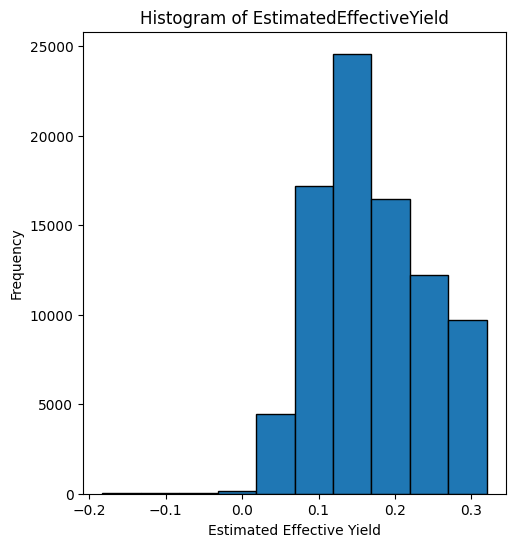

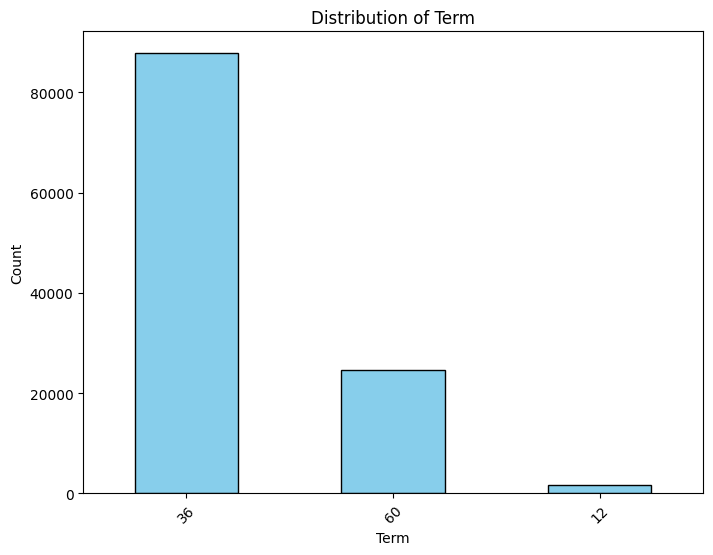

In [5]:
# Histogram for EstimatedEffectiveYield

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # (rows, cols, panel number)
plt.hist(df['EstimatedEffectiveYield'], bins=10, edgecolor='black')
plt.title('Histogram of EstimatedEffectiveYield')
plt.xlabel('Estimated Effective Yield')
plt.ylabel('Frequency')

# Bar Chart for Distribution of Term
term_counts = df['Term'].value_counts()

plt.figure(figsize=(8, 6))
term_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I didn't see any major unusual points. I did notice there were a few 12 terms and low yield, but that's a given.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No, at this point, nothing seemed especially odd.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).


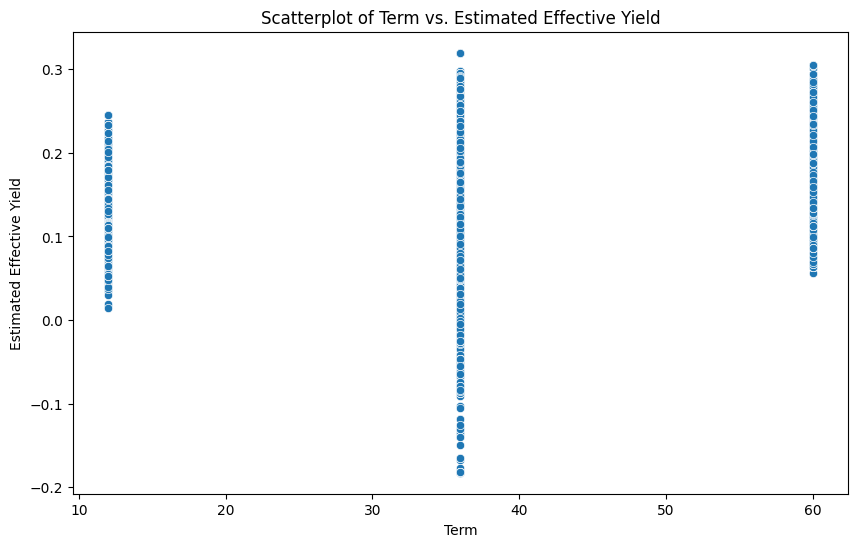

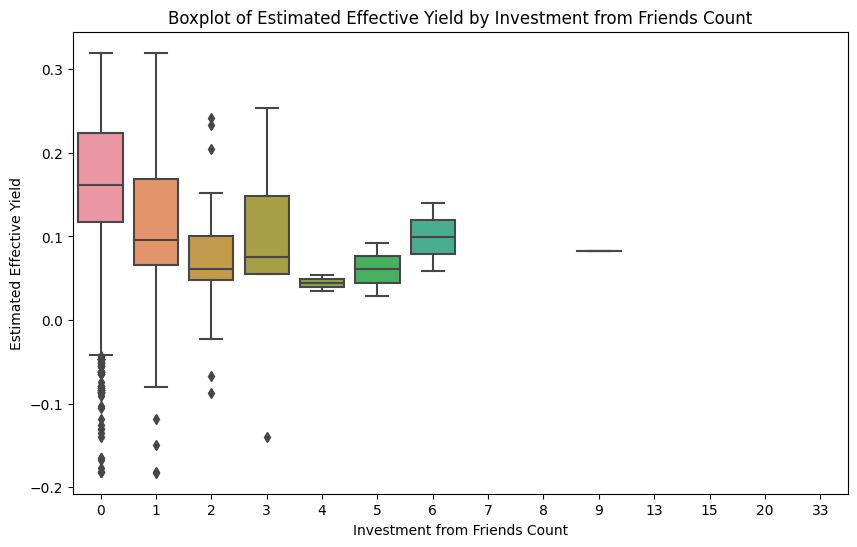

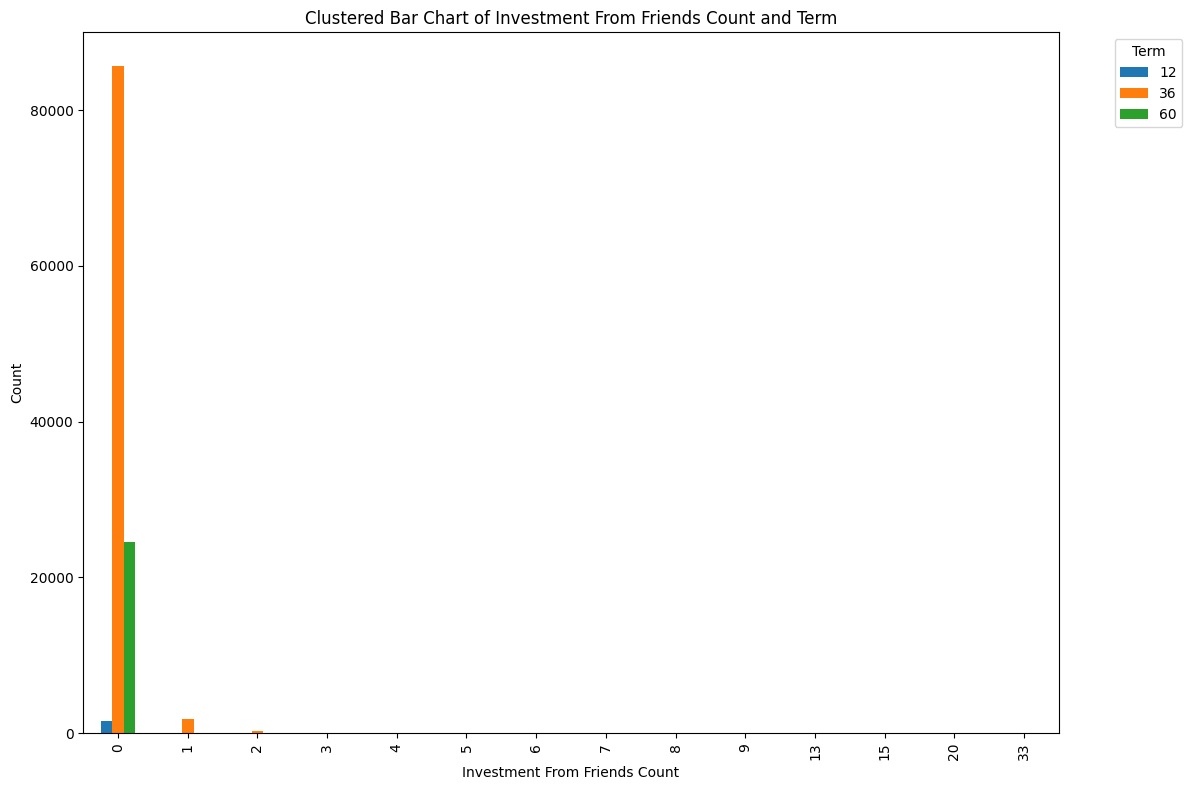

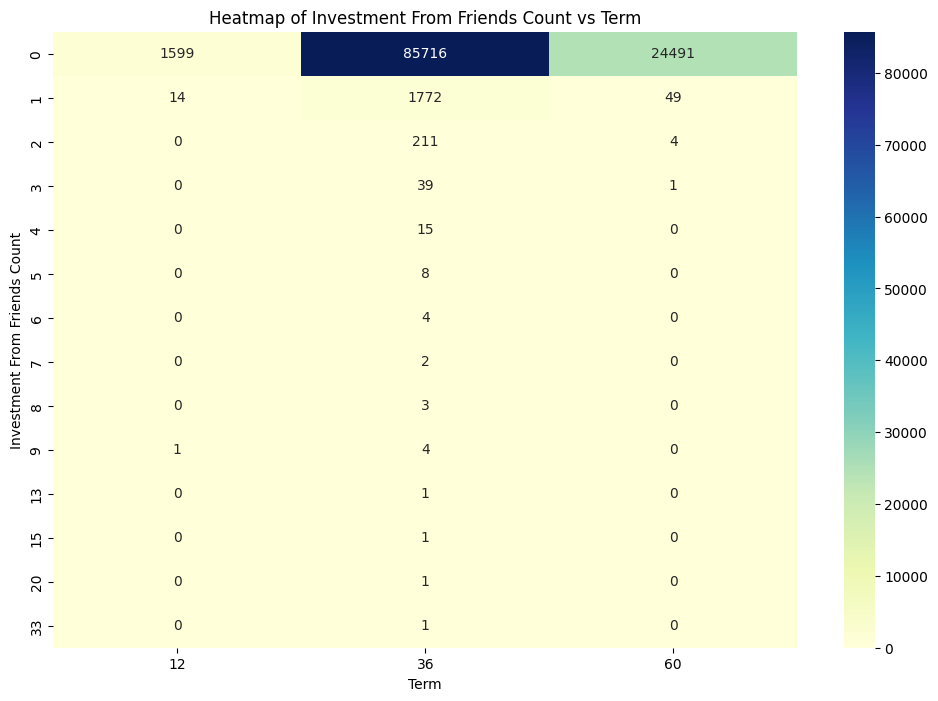

In [10]:
# Scatterplot: Term vs. EstimatedEffectiveYield
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Term', y='EstimatedEffectiveYield')
plt.title('Scatterplot of Term vs. Estimated Effective Yield')
plt.xlabel('Term')
plt.ylabel('Estimated Effective Yield')
plt.show()

# Boxplot: EstimatedEffectiveYield vs. InvestmentfromFriendsCount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='InvestmentFromFriendsCount', y='EstimatedEffectiveYield')
plt.title('Boxplot of Estimated Effective Yield by Investment from Friends Count')
plt.xlabel('Investment from Friends Count')
plt.ylabel('Estimated Effective Yield')
plt.show()

# Grouping data by 'Term' and 'InvestmentFromFriendsCount'
grouped_df = df.groupby(['Term', 'InvestmentFromFriendsCount']).size().unstack()

# Plotting the clustered bar chart

# Grouping data by 'InvestmentFromFriendsCount' and 'Term'
grouped_df = df.groupby(['InvestmentFromFriendsCount', 'Term']).size().unstack()

# Plotting the clustered bar chart
grouped_df.plot(kind='bar', figsize=(12, 8))

plt.title('Clustered Bar Chart of Investment From Friends Count and Term')
plt.xlabel('Investment From Friends Count')
plt.ylabel('Count')
plt.legend(title='Term', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Creating a pivot table for the heatmap
heatmap_data = df.pivot_table(index='InvestmentFromFriendsCount', columns='Term', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Investment From Friends Count vs Term')
plt.xlabel('Term')
plt.ylabel('Investment From Friends Count')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Term versus EffectiveEstimatedYield did not seem to have a correlation. Investment From Friends Count looked a little more promising in terms of narrowing the area, but only slightly weak negative correlation. This could be because Investments from Friends mode is zero. The mode of term is 36 (with more variation) and its unclear how any of that relates to EstimatedEffectiveYield.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.


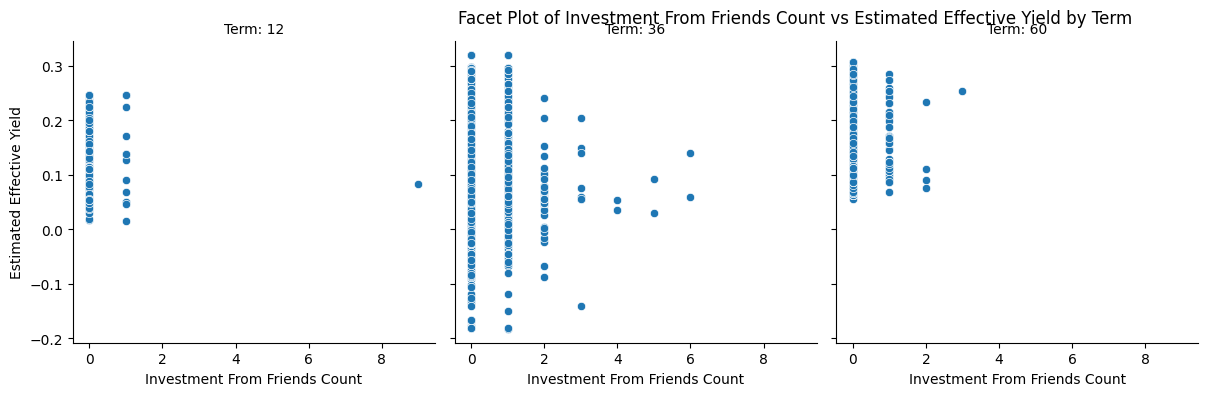

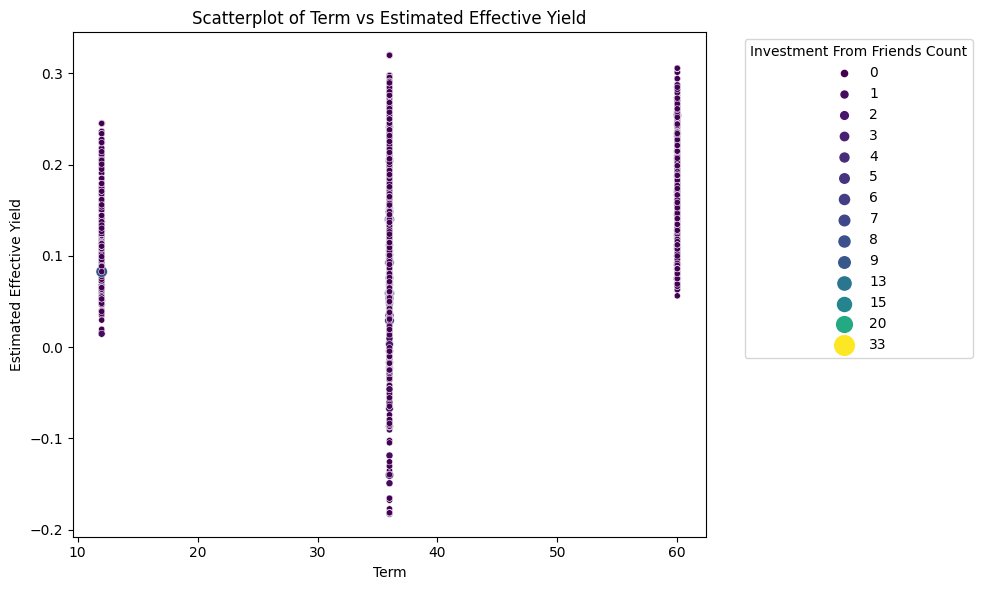

In [14]:
#FacetPlot

g = sns.FacetGrid(df, col='Term', col_wrap=4, height=4, aspect=1)
g.map(sns.scatterplot, 'InvestmentFromFriendsCount', 'EstimatedEffectiveYield')

g.set_axis_labels('Investment From Friends Count', 'Estimated Effective Yield')
g.set_titles('Term: {col_name}')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Plot of Investment From Friends Count vs Estimated Effective Yield by Term')
plt.show()

#

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Term',
    y='EstimatedEffectiveYield',
    hue='InvestmentFromFriendsCount',  # Color encoding
    size='InvestmentFromFriendsCount',  # Size encoding
    sizes=(20, 200),  # Range of point sizes
    palette='viridis',  # Color palette
    legend='full'
)

plt.title('Scatterplot of Term vs Estimated Effective Yield')
plt.xlabel('Term')
plt.ylabel('Estimated Effective Yield')
plt.legend(title='Investment From Friends Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Again, I don't really think I found anything of interest in this investigation. The closest most interesting thing I found was there was greater variation in yield and investment from friends count in the 36 month term, but this might be because there's a lot more data points.

### Were there any interesting or surprising interactions between features?

>I didn't really find anything super valuable within this data. 

## Conclusions

I was curious if the amount of friend investors affected the Estimated Yield or the Term Length. I thought it could answer a longstanding question of whether friends give other friends a better deal ex ante. I thought maybe that would be the case. I didn't see any super powerful evidence for my thought process.

I started by examining the variables independently. EstimatedEffectiveYield looked normal-ish, Friends was skewed right, and distribution of term also looked uneven: most cases were 36 month.


Next, I wanted to look at relationships between the variables. I made a scatterplot of term versus effective yield, and saw nothing promising. Then, I looked at the boxplot and saw a general narrowing of values of effective yield, but it looked like a weak negative correlation, but a fuzzy one. Afterwards, I examined a heatmap to see the different combinations of variables. Looking at this, the biggest individual datapoint was that tons of 0 friends had a 36 term, and most investors didn't have friends investing in them. 

Finally, I started trying to add the other variable in to get greater insight. I created a facet plot which vaguely looked like what I used undergraduate to create time-series panels. It showed a bit more variation in the 36 month section, but considering it's the largest section, it makes sense we'd see more distinct values. I followed that up by creating a scatterplot of Term versus effective yield and encoded investment from friends count to be larger and different colored so we could better distinguish. Since zero and 1 were the overwhelming mode, it didn't end up adding much more insight.

Overall, I don't feel like this project resulted in any major statistical insights. I don't think the visualization of friendly investors and estimated yield appeared strong enough to pass statistical tests. 

Insights:

>There are no strong correlations between Term Length and Estimated Yield

>There is no strong correlation between Term Length or FriendInvestorCount.

>There is a weak negative correlation between Friend Investor Count and Estimated Yield but could be a result of narrowing ranges.

>student loans are overwhelmingly not financed by friends

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

